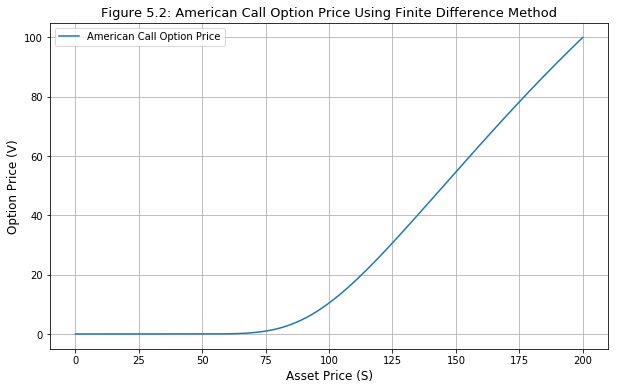

American Call Option Price using Finite Difference: 10.4498


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os

def finite_difference_american_call(S_max, K, T, r, sigma, M, N):
    # Asset price grid
    S = np.linspace(0, S_max, M + 1)
    dt = T / N
    dS = S_max / M

    # Terminal payoff at maturity
    V = np.maximum(S - K, 0)

    # Coefficients for interior nodes
    alpha = 0.5 * dt * ((sigma ** 2) * (S[1:-1] / dS) ** 2 - r * (S[1:-1] / dS))
    beta = 1 - dt * ((sigma ** 2) * (S[1:-1] / dS) ** 2 + r)
    gamma = 0.5 * dt * ((sigma ** 2) * (S[1:-1] / dS) ** 2 + r * (S[1:-1] / dS))

    # Time-stepping loop (backward)
    for j in range(N - 1, -1, -1):
        V[1:-1] = alpha * V[0:-2] + beta * V[1:-1] + gamma * V[2:]
        V[1:-1] = np.maximum(V[1:-1], S[1:-1] - K)  # Early exercise

        # Boundary conditions
        V[0] = 0
        V[-1] = max(S_max - K, 0)

    return S, V  # Return full grid for plotting

# Parameters
S_max = 200
K = 100
T = 1
r = 0.05
sigma = 0.2
M = 500
N = 10000

# Run method
S, V = finite_difference_american_call(S_max, K, T, r, sigma, M, N)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S, V, label="American Call Option Price")
plt.xlabel("Asset Price (S)", fontsize=12)
plt.ylabel("Option Price (V)", fontsize=12)
plt.title("Figure 5.2: American Call Option Price Using Finite Difference Method", fontsize=13)
plt.grid(True)
plt.legend()

# Save plot to desired path
save_path = r"F:\GITHUB\computational-finance-models\chart"
os.makedirs(save_path, exist_ok=True)
file_name = "Figure 5.2 - American Call Option Price Using Finite Difference Method.png"
plt.savefig(os.path.join(save_path, file_name), dpi=300)

plt.show()

# Output price near strike
mid_index = np.abs(S - K).argmin()
print(f"American Call Option Price using Finite Difference: {V[mid_index]:.4f}")
